**Step 1: Import Libraries & Load Data**

In [8]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Base path to project
base_path = "/content/drive/MyDrive/ds_<Yash_Sunilbhai_Patel>"

# Step 2: Load datasets
trader_data = pd.read_csv(base_path + "/csv_files/historical_data.csv")
sentiment_data = pd.read_csv(base_path + "/csv_files/fear_greed_index.csv")

# Step 3: Preview
print("Trader Data Sample:")
display(trader_data.head())

print("\nSentiment Data Sample:")
display(sentiment_data.head())

print("\nShapes:", trader_data.shape, sentiment_data.shape)


Trader Data Sample:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Sentiment Data Sample:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Shapes: (211224, 16) (2644, 4)


**Step 2: Cleaning and Preproessing**

In [9]:
# Make a copy
trader = trader_data.copy()
sentiment = sentiment_data.copy()

# --Clean trader data --
# Standardize column names

trader.columns = trader.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert timestamp to datetime
trader["timestamp_ist"] = pd.to_datetime(trader["timestamp_ist"], format = "%d-%m-%Y %H:%M")

# Extract date only(to match sentiment dataset)
trader["date"] = trader["timestamp_ist"].dt.date


# -- Clean sentiment data --
sentiment.columns = sentiment.columns.str.strip().str.lower().str.replace(" ", "_")

# Ensure date is datetime
sentiment["date"] = pd.to_datetime(sentiment["date"]).dt.date

# -- Quick Checks --

print("Trader cleaned columns:", trader.columns.to_list())
print("Sentiment cleaned columns:", sentiment.columns.to_list())

print("\nTrader sample after cleaning:")
display(trader.head(3))

print("\nSentiment sample after cleaning:")
display(sentiment.head(3))

Trader cleaned columns: ['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp', 'date']
Sentiment cleaned columns: ['timestamp', 'value', 'classification', 'date']

Trader sample after cleaning:


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02



Sentiment sample after cleaning:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03


**Step 3: Save Cleaned Versions**

In [10]:
# Save cleaned versions for reproducibility
trader.to_csv(base_path + "/csv_files/trader_data_clean.csv", index=False)
sentiment.to_csv(base_path + "/csv_files/sentiment_data_clean.csv", index=False)

**Step 4: Exploratory Data Analysis (EDA)**

*   **(A) Trader Behavior Overview**



Trader Data Summary:


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date
count,211224,211224,211224.000000,2.112240e+05,2.112240e+05,211224,211224,2.112240e+05,211224,211224.000000,211224,2.112240e+05,211224,211224.000000,2.112240e+05,2.112240e+05,211224
unique,32,246,NaN,NaN,NaN,2,NaN,NaN,12,NaN,101184,NaN,2,NaN,NaN,NaN,480
top,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,NaN,NaN,NaN,SELL,NaN,NaN,Open Long,NaN,0x00000000000000000000000000000000000000000000...,NaN,True,NaN,NaN,NaN,2025-02-25
freq,40184,68005,NaN,NaN,NaN,108528,NaN,NaN,49895,NaN,9032,NaN,128403,NaN,NaN,NaN,6246
mean,NaN,NaN,11414.723350,4.623365e+03,5.639451e+03,NaN,2025-01-31 12:04:22.915009792,-2.994625e+04,NaN,48.749001,NaN,6.965388e+10,NaN,1.163967,5.628549e+14,1.737744e+12,NaN
min,NaN,NaN,0.000005,8.740000e-07,0.000000e+00,NaN,2023-05-01 01:06:00,-1.433463e+07,NaN,-117990.104100,NaN,1.732711e+08,NaN,-1.175712,0.000000e+00,1.680000e+12,NaN
25%,NaN,NaN,4.854700,2.940000e+00,1.937900e+02,NaN,2024-12-31 21:00:45,-3.762311e+02,NaN,0.000000,NaN,5.983853e+10,NaN,0.016121,2.810000e+14,1.740000e+12,NaN
50%,NaN,NaN,18.280000,3.200000e+01,5.970450e+02,NaN,2025-02-24 18:55:00,8.472793e+01,NaN,0.000000,NaN,7.442939e+10,NaN,0.089578,5.620000e+14,1.740000e+12,NaN
75%,NaN,NaN,101.580000,1.879025e+02,2.058960e+03,NaN,2025-04-02 18:22:00,9.337278e+03,NaN,5.792797,NaN,8.335543e+10,NaN,0.393811,8.460000e+14,1.740000e+12,NaN
max,NaN,NaN,109004.000000,1.582244e+07,3.921431e+06,NaN,2025-05-01 12:13:00,3.050948e+07,NaN,135329.090100,NaN,9.014923e+10,NaN,837.471593,1.130000e+15,1.750000e+12,NaN


/tmp/ipython-input-3561671296.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = trader, x = "side", palette = 'Set2')


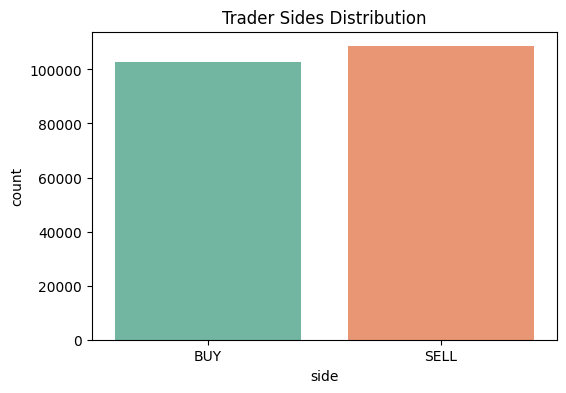

In [11]:
# Basic Stats
print("Trader Data Summary:")
display(trader.describe(include = "all"))

# 1. Distribution of trade sales (BUY vs SELL)
plt.figure(figsize = (6, 4))
sns.countplot(data = trader, x = "side", palette = 'Set2')
plt.title("Trader Sides Distribution")
plt.savefig(base_path + "/outputs/trade_sides_distribution.png")
plt.show()

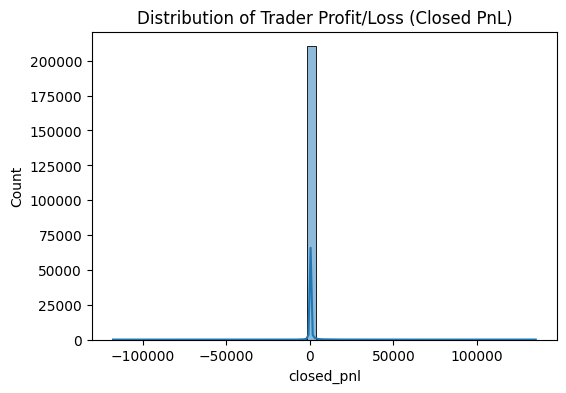

In [12]:
# 2. Distribution of Closed PnL
plt.figure(figsize = (6, 4))
sns.histplot(trader["closed_pnl"], bins = 50, kde = True)
plt.title("Distribution of Trader Profit/Loss (Closed PnL)")
plt.savefig(base_path + "/outputs/trader_pnl_distribution.png")
plt.show()

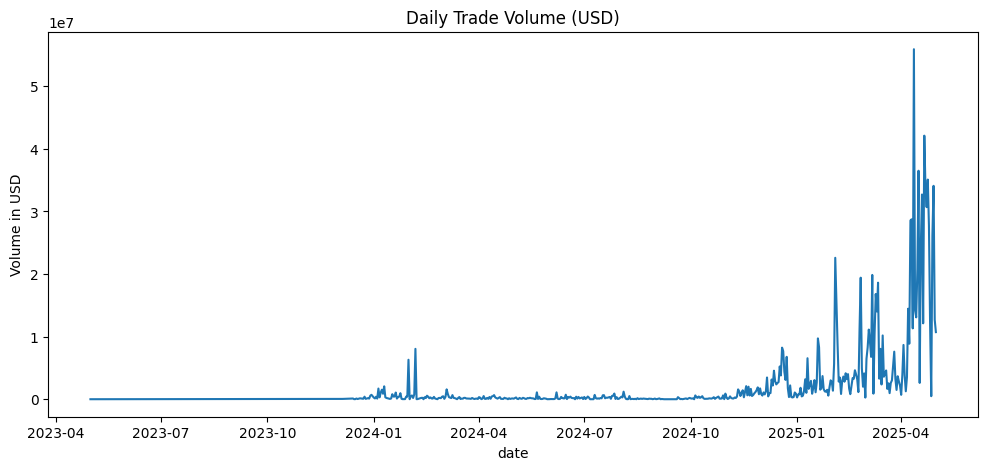

In [13]:
# 3. Daily Trade Volume (USD)
daily_volume = trader.groupby("date")["size_usd"].sum()
plt.figure(figsize = (12, 5))
daily_volume.plot()
plt.title("Daily Trade Volume (USD)")
plt.ylabel("Volume in USD")
plt.savefig(base_path + "/outputs/daily_trade_volume.png")
plt.show()



*   **(B) Sentiment Overview**



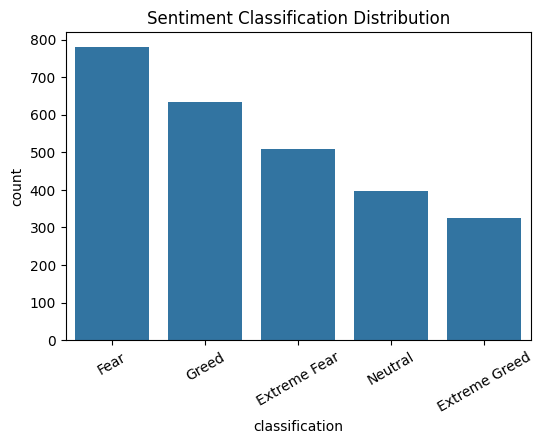

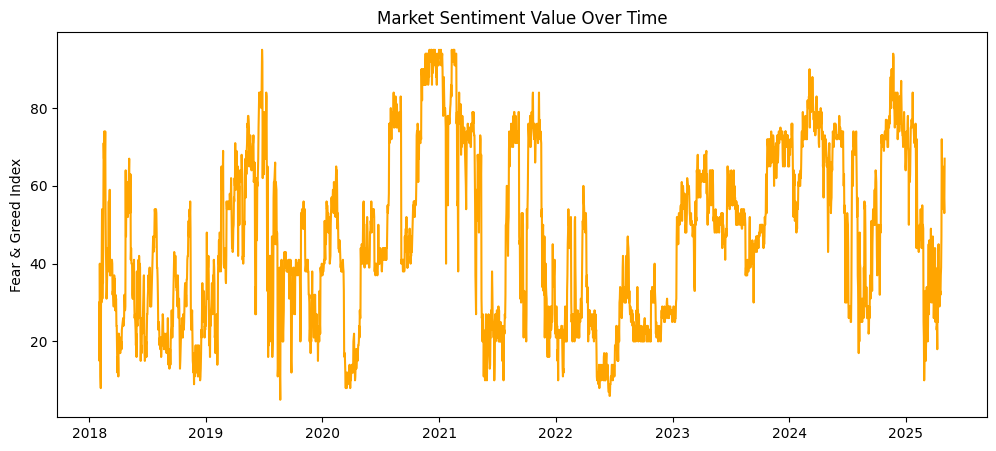

In [16]:
# Count of sentiment categories
plt.figure(figsize = (6, 4))
sns.countplot(data = sentiment, x = "classification", order = sentiment["classification"].value_counts().index)
plt.title("Sentiment Classification Distribution")
plt.xticks(rotation = 30)
plt.savefig(base_path + "/outputs/sentiment_classification_distribution.png")
plt.show()

# Sentiment trend over time (value)
plt.figure(figsize = (12, 5))
plt.plot(sentiment["date"], sentiment["value"], color = "orange")
plt.title("Market Sentiment Value Over Time")
plt.ylabel("Fear & Greed Index")
plt.savefig(base_path + "/outputs/sentiment_trend.png")
plt.show()

**Step 5: Linking Trader Behavior with Market Sentiment**

*   **(A) Merge Datasets on Date**




In [17]:
# Merge trader + sentiment data by date
merged = pd.merge(trader, sentiment, on = "date", how = "inner")

print("Merged dataset shape:",merged.shape)
display(merged.head())

Merged dataset shape: (211218, 20)


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp_x,date,timestamp_y,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed


*   **(B) Avg Trader PnL by Sentiment Classification**



/tmp/ipython-input-4152583228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pnl_by_sentiment.index, y = pnl_by_sentiment.values, palette = "coolwarm")


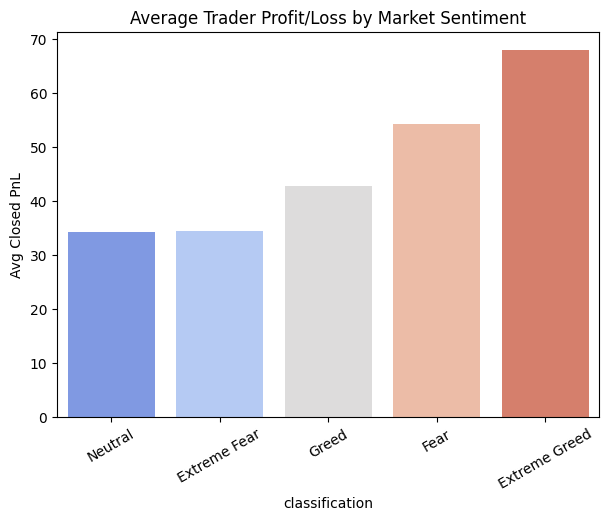

In [18]:
pnl_by_sentiment = merged.groupby("classification")["closed_pnl"].mean().sort_values()

plt.figure(figsize = (7, 5))
sns.barplot(x = pnl_by_sentiment.index, y = pnl_by_sentiment.values, palette = "coolwarm")
plt.title("Average Trader Profit/Loss by Market Sentiment")
plt.xticks(rotation = 30)
plt.ylabel("Avg Closed PnL")
plt.savefig(base_path + "/outputs/pnl_by_sentiment.png")
plt.show()

*   **(C) Trade Volume vs Sentiment Value**



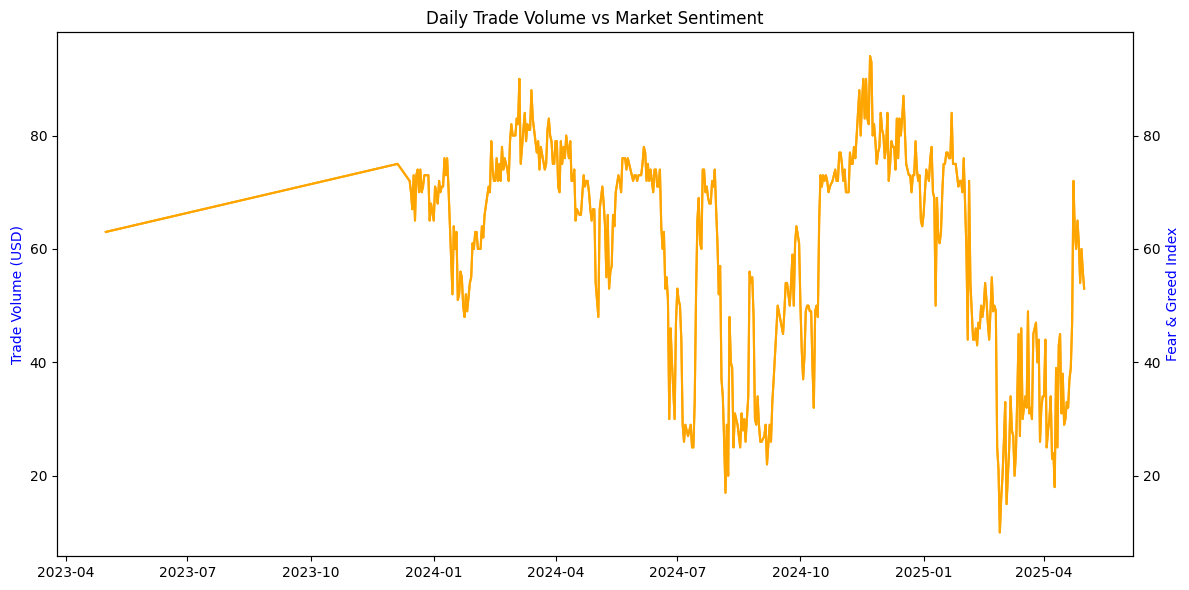

In [19]:
# Aggregate daily stats
daily_stats = merged.groupby("date").agg({
    "size_usd": "sum",
    "closed_pnl": "mean",
    "value": "mean"
}).reset_index()

fig, ax1 = plt.subplots(figsize = (12, 6))

ax1.plot(daily_stats["date"], daily_stats["value"], color = "orange", label = "Sentiment Index")
ax1.set_ylabel("Trade Volume (USD)", color = "blue")

ax2 = ax1.twinx()
ax2.plot(daily_stats["date"], daily_stats["value"], color = "orange", label = "Sentiment Index")
ax2.set_ylabel("Fear & Greed Index", color = "blue")

plt.title("Daily Trade Volume vs Market Sentiment")
fig.tight_layout()
plt.savefig(base_path + "/outputs/volume_vs_sentiment.png")
plt.show()

*   **(D) BUY vs SELL Behavior in Different Sentiments**



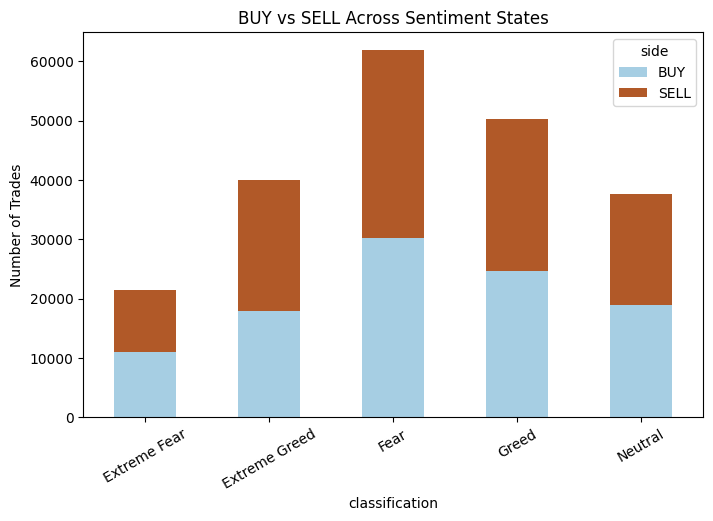

In [21]:
buy_sell_sentiment = merged.groupby(["classification", "side"]).size().unstack().fillna(0)

buy_sell_sentiment.plot(kind = "bar", figsize = (8, 5), stacked = True, colormap = "Paired")
plt.title("BUY vs SELL Across Sentiment States")
plt.ylabel("Number of Trades")
plt.xticks(rotation = 30)
plt.savefig(base_path + "/outputs/buy_sell_sentiment.png")
plt.show()

**Step 6: Extract Key Insights**


* **(A) Profitability under Fear vs Greed**



In [22]:
insight_pnl = merged.groupby("classification")["closed_pnl"].agg(["mean", "median", "count"])
print("PnL Summary by Market Sentiment:")
print(insight_pnl)

PnL Summary by Market Sentiment:
                     mean  median  count
classification                          
Extreme Fear    34.537862     0.0  21400
Extreme Greed   67.892861     0.0  39992
Fear            54.290400     0.0  61837
Greed           42.743559     0.0  50303
Neutral         34.307718     0.0  37686




*   **(B) High Volume Days in Fear vs Greed**



In [28]:
high_vol = daily_stats.sort_values("size_usd", ascending = False).head(10)
print("Top 10 Trading Volume Days:")
display(high_vol[["date", "size_usd", "value"]])

Top 10 Trading Volume Days:


,date,size_usd,value
459,2025-04-12,55914617.49,43.0
468,2025-04-21,42104054.84,39.0
463,2025-04-16,36502715.90,29.0
471,2025-04-24,35088918.64,63.0
476,2025-04-29,34089511.66,60.0
469,2025-04-22,33753625.24,47.0
466,2025-04-19,32706462.71,32.0
470,2025-04-23,30682443.79,72.0
457,2025-04-10,28741953.29,39.0
456,2025-04-09,28556806.47,18.0




*   **(D) Correlation Between Sentiment and Trader Behavior**



In [29]:
corr = daily_stats[["size_usd", "closed_pnl", "value"]].corr()
print("Correlation Matrix:")
print(corr)

Correlation Matrix:
            size_usd  closed_pnl     value
size_usd    1.000000    0.013028 -0.264371
closed_pnl  0.013028    1.000000  0.037315
value      -0.264371    0.037315  1.000000
